In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc


In [8]:
#load dataset and set the first column as the index
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)
df.columns = ['Y', 'X']


In [9]:
#Extract the values of x and y as numpy arrays for mathematical operations
X = df.X.values
Y = df.Y.values

# calculate the eman of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# calculate the slope of the regression line using the least squares method
m =sum ((X -x_bar) *(Y-y_bar)/ sum((X-x_bar))**2)

# calculate the intercept of the regression line
c=  y_bar - m* x_bar

#output the calculated slope and intercept
print("Slope =", m)
print("Intercept =", c)



Slope = 6.617182583660791e+25
Intercept = -4.803041696251207e+30


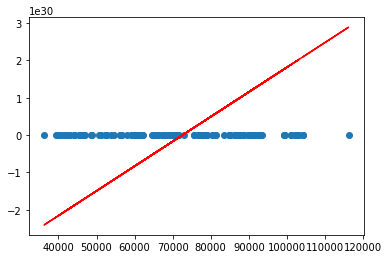

In [10]:
# Plot the lines we have calculated coefficienits for
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:
        y_i = m*x_i + c
        y_gen.append(y_i)

    return(y_gen)


y_gen = m*df.X +c
# plot the original data points on a scatter plot
plt.scatter(df.X, df.Y)
#Plot the regressional line using the generated y-values
plt.plot(df.X, y_gen, color ='red')
plt.show()


In [11]:
errors2 = np.array(y_gen - df.Y) # Calculate the residuals by subtracting the observed Y values from the generated Y values
print(np.round(errors2, 2)) # Print the residuals, rounded to 2 decimal places

[-2.19872906e+30 -1.69651732e+30 -1.41829391e+30 -1.08588305e+30
 -1.08150843e+30 -8.22149286e+29 -7.48815683e+29 -8.06862932e+29
 -7.62104309e+29 -4.58691268e+29 -1.23784268e+30 -1.59098914e+30
 -2.40419721e+30 -1.88739525e+30 -1.34439917e+30 -2.11273811e+30
 -2.05976955e+30 -1.95506256e+30 -1.86091725e+30 -2.16406759e+30
 -1.78988048e+30 -1.88559935e+30 -1.76867571e+30 -1.80137717e+30
 -2.00909053e+30 -1.72920621e+30 -1.04893271e+30 -1.56847947e+30
 -1.31032002e+30 -7.67099621e+29 -6.98604502e+29 -1.19261887e+30
 -8.64842686e+29 -8.37737383e+29 -6.86205225e+29 -8.27599198e+29
 -1.45543880e+30 -9.69437183e+29 -4.03275673e+29 -8.89742483e+29
 -7.00053003e+29 -2.84296745e+29 -5.31975242e+29 -3.01669496e+29
  2.77636385e+29 -2.11464063e+29  2.92941929e+29 -1.85886667e+29
 -8.50024168e+29 -4.43563727e+29 -1.87041366e+29 -8.33765750e+29
 -1.08190356e+29 -9.64891923e+28 -1.39350669e+29 -1.14285443e+29
 -4.88827241e+29 -2.30618160e+29  2.74780409e+29 -3.57415289e+29
 -7.01801263e+29 -5.68033

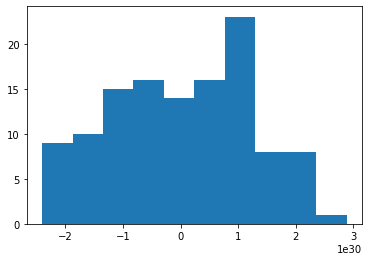

In [12]:
plt.hist(errors2)
plt.show()

In [13]:
# Calculate the Residual Sum of Squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 1.7513826586872188e+62


In [14]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(errors2.sum(),11)

2.026619832316723e+16

In [15]:
# Linear regression in sci-kit learn
# load the LinearRegression library
from sklearn.linear_model import LinearRegression #imports the LienarRegression class from sci-kit learns linear_model module


In [16]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator wi

In [17]:
#initliaisng the LinearRegression model
lm= LinearRegression()
# so here we have inititliased a model of the form y=mx+c

In [18]:
# reshape the X array to a 2Darray as required by skcit-learn
# it converts tfrom a pandas series to a numpy series
X = df.X.values[:, np.newaxis]

In [19]:
#fit the lienar model to the data
lm.fit(X, df.Y)

LinearRegression()

In [21]:
# Extract the slope (coefficient ) and intercept from the fitted model
m = lm.coef_[0]
c= lm.intercept_
# print the slope and intercept
print("Slope: \t\t", m)
print("Intercept:\t", c)

Slope: 		 0.00011350725765884303
Intercept:	 1.8448114670426445


In [22]:
# Getting model predictions
# use the fitted model to geerate Y values from the X values
gen_y = lm.predict(X)

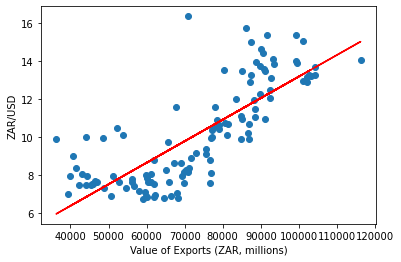

In [24]:
# plot the results
plt.scatter(X, df.Y)# plot the original data
plt.plot(X, gen_y, color="red")
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

In [25]:
#Accessing the model accuracy
# Do that by calculating the Residual Sum of Squares
# The Residual Sum of Squares is the sum of the difference between the initial Y and the sum of the genrated y
print("Residual sum of squares: ", ((gen_y - df.Y) **2).sum())

Residual sum of squares:  321.45716655257655


In [26]:
#import metrics from scikit-learn
from sklearn import metrics

In [27]:
# calculate the Mean Squared Error between the observed and predicted Y values
print("MSE: ", metrics.mean_squared_error(df.Y, gen_y))

MSE:  2.678809721271471


In [28]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X))

Residual sum of squares: 321.45716655257655


In [29]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207
